In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
iris = load_iris()

In [31]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
data['target'] = iris.target

In [35]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
data = data.drop(columns = ['sepal length (cm)', 'sepal width (cm)'])

In [37]:
data.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
 2   target             150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


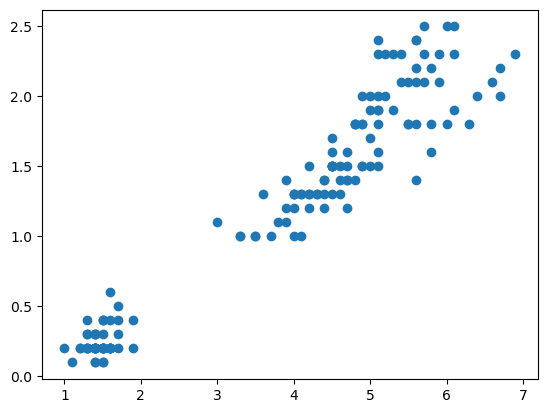

In [39]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.show()

In [52]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [53]:
y_predicted = km.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
y_predicted

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [54]:
data['cluster'] = y_predicted
data.head(100)

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
95,4.2,1.2,1,2
96,4.2,1.3,1,2
97,4.3,1.3,1,2
98,3.0,1.1,1,2


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17248\3617144369.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


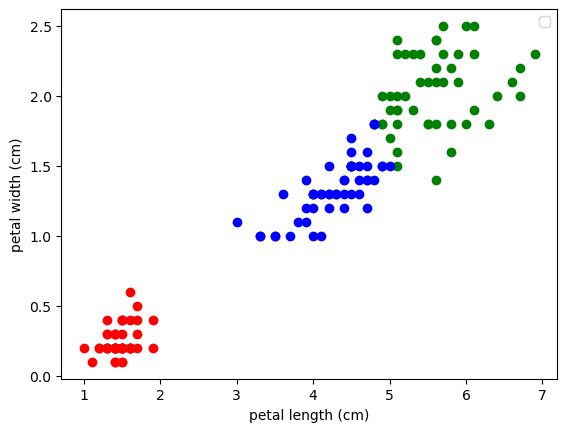

In [55]:
data_1 = data[data.cluster==0]
data_2 = data[data.cluster==1]
data_3 = data[data.cluster==2]

plt.scatter(data_1['petal length (cm)'], data_1['petal width (cm)'], color = 'green')
plt.scatter(data_2['petal length (cm)'], data_2['petal width (cm)'], color = 'red')
plt.scatter(data_3['petal length (cm)'], data_3['petal width (cm)'], color = 'blue')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [56]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

In [57]:
sse

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 20.299607803485397,
 13.983213141025642,
 11.609952441077443,
 10.195600076394195,
 9.098543401043399,
 6.695847251528029]

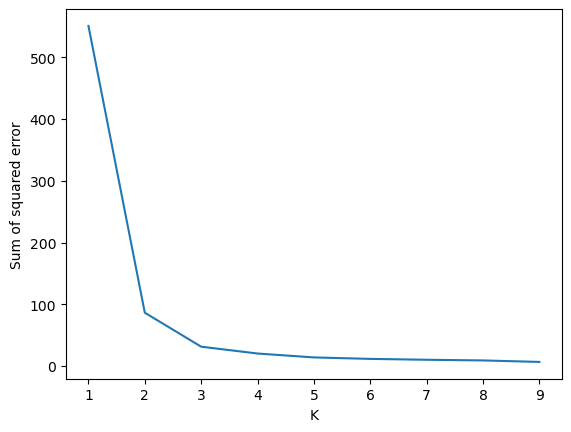

In [58]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)
plt.show()

In [59]:
km_1 = KMeans(n_clusters = 2)
km_1

KMeans(n_clusters=2)

In [60]:
y_predicted = km_1.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
y_predicted

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [61]:
data['cluster_1'] = y_predicted
data.head(100)

,petal length (cm),petal width (cm),target,cluster,cluster_1
0,1.4,0.2,0,1,1
1,1.4,0.2,0,1,1
2,1.3,0.2,0,1,1
3,1.5,0.2,0,1,1
4,1.4,0.2,0,1,1
...,...,...,...,...,...
95,4.2,1.2,1,2,0
96,4.2,1.3,1,2,0
97,4.3,1.3,1,2,0
98,3.0,1.1,1,2,1


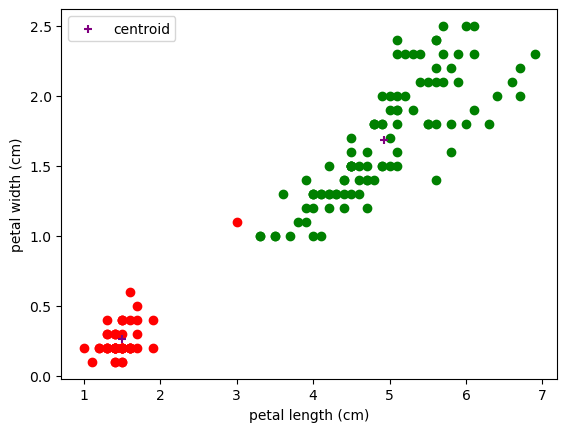

In [64]:
data_1 = data[data.cluster_1==0]
data_2 = data[data.cluster_1==1]

plt.scatter(data_1['petal length (cm)'], data_1['petal width (cm)'], color = 'green')
plt.scatter(data_2['petal length (cm)'], data_2['petal width (cm)'], color = 'red')

plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()